# MNIST: Simple CNN keras (Accuracy : 0.99)=>Top 1%

원본 출처: https://www.kaggle.com/code/elcaiseri/mnist-simple-cnn-keras-accuracy-0-99-top-1/notebook

상단 메뉴 런타임 - 런타임 유형 변경에서 **GPU**를 선택하고 진행하세요.

## 이미지 변환 함수 (PNG -> 정규화된 일차원 배열)

In [ ]:
# image_prepare(파일이름)으로 호출하면 정규화된 일차원 리스트를 반환합니다.

from PIL import Image, ImageFilter

def image_prepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

##TODO 1: 여러분의 PNG 파일 변환
Colab으로 0.png ~ 9.png를 복사한 후 진행하세요.

In [ ]:
import numpy as np

# 10장의 28 x 28 크기, 흑백 1채널
img_array = np.empty((10,28,28,1))

for i in range(10):
  # 리스트를 NumPy 배열로 변환
  img = np.array(image_prepare(f'{i}.png'))
  # (784, ) -> (28, 28, 1)
  img_array[i] = img.reshape(28, 28, 1)

## TODO 2: ImageDataGenerator 설정

1. 0도부터 10도까지 무작위로 회전시키기
2. 이미지 너비를 10%까지 줄이거나 늘리기
3. 이미지 높이를 10%까지 줄이거나 늘리기
4. 이미지를 뒤집는 것을 허용해야 할까요? 
5. 이미지를 왼쪽 오른쪽으로 뒤집는 것을 허용해야 할까요? 

Hint: https://keras.io/ko/preprocessing/image/

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(   
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

## TODO 3: Image 생성

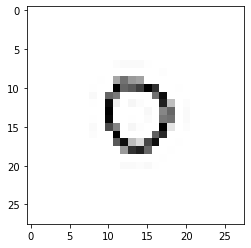

In [ ]:
# 여러분의 0을 그려보세요.
import matplotlib.pyplot as plt

# 그릴 때에는 (28, 28, 1)을 (28, 28)로 reshape하세요.
digit = img_array[0].reshape(28,28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

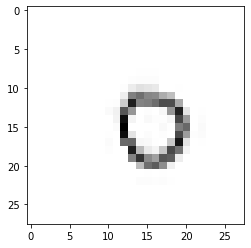

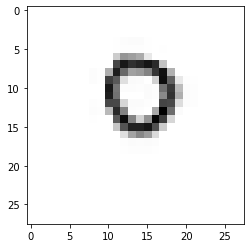

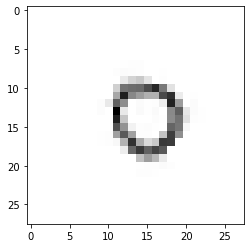

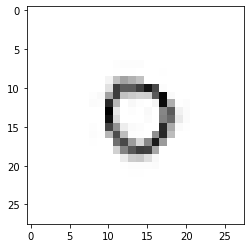

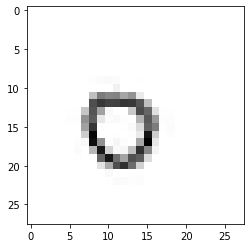

In [ ]:
# 여러분의 0을 변환해서 무작위로 5개의 0을 만들어 그려보세요.
new_zeroes = []

for i in range(5):
  # random_transform 입력에 이미지 입력
  new_zero = datagen.random_transform(digit.reshape(28,28,1))
  # new_zero에 reshape 필요
  plt.imshow(new_zero.reshape(28,28), cmap=plt.cm.binary)
  plt.show()

## MNIST 불러와서 전처리하기

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 모델 정의


In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))    
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))    
model.add(layers.Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

## 모델 훈련
고정된 훈련 데이터가 아니라 datagen을 통해 변환된 훈련 데이터로 훈련합니다. 기존과 달리 동일한 이미지를 반복해서 보지 않습니다.

In [ ]:
epochs = 15
batch_size = 64

# train_gen은 x (그림)과 y (label)을 함께 생성합니다.
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)

# generator 사용 시 y 값을 주면 안되고, validation_split은 사용할 수 없습니다.
model.fit(train_gen, epochs=epochs)

Epoch 1/15
938/938 [==============================] - 43s 35ms/step - loss: 0.1887 - accuracy: 0.9393
Epoch 2/15
938/938 [==============================] - 33s 36ms/step - loss: 0.0589 - accuracy: 0.9822
Epoch 3/15
938/938 [==============================] - 33s 35ms/step - loss: 0.0460 - accuracy: 0.9867
Epoch 4/15
938/938 [==============================] - 32s 34ms/step - loss: 0.0383 - accuracy: 0.9891
Epoch 5/15
938/938 [==============================] - 32s 34ms/step - loss: 0.0360 - accuracy: 0.9894
Epoch 6/15
938/938 [==============================] - 32s 34ms/step - loss: 0.0320 - accuracy: 0.9906
Epoch 7/15
938/938 [==============================] - 33s 35ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 8/15
938/938 [==============================] - 32s 35ms/step - loss: 0.0269 - accuracy: 0.9921
Epoch 9/15
938/938 [==============================] - 33s 35ms/step - loss: 0.0252 - accuracy: 0.9922
Epoch 10/15
938/938 [==============================] - 32s 34ms/step - loss: 0.022

## 모델 평가

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.01504766196012497
Test accuracy: 0.995199978351593


## TODO4: 여러분의 그림 10장 예측하기

In [ ]:
res = model.predict(img_array)
# 0, 1, 2, ..., 9가 순서대로 나와야 이상적인 결과입니다.
for r in res:
  print(np.argmax(r))

9
1
2
3
4
5
1
1
8
9


In [ ]:
# 70%